#  Исследование об успешности игры для планировния рекламной кампании.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 

# Описание данных

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Изучение общей информации

**Импортируем необходимые библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную `games`. Путь к файлу:**

`/datasets/games.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv')

**Выведем первые 10 строчек датафрейма `games` на экран и выведем основную информацию о датасете с помощью метода `info()`**

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Сделаем проверку на количетсво дубликатов методом `duplicated()` и сделаем сводку числовых значений в нашем датасете методом `describe()`:** 

In [5]:
print('Количество дубликатов:', games.duplicated().sum())
games.describe()

Количество дубликатов: 0


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Вывод:

Основываясь на полученных первоначальных данных можно сказать, что их достаточно для проведения анализа. 

Одновременно с этим в датафрейме были обнаружены некоторые проблемы:

- Присутствуют проущенные значения в столбцах;
- Названия столбцов не приведены к нижнему регистру;
- В столбцах `year_of_release` и `critic_score` можно изменить тип данных на `int` для оптимизации расхода памяти;

На последних строках датафрейма можно заметить отсутствие оценок и рейтингов у игр, продажи которых на низкм уровне - это скорее всего связано с тем, что игры ещё не набрали популярность или не "выстрелили";

Также можно предположить, что закономерность связи между пропусками в оценках и выставлением оценок американской компанией минимальная - так как рейтинговое агенство могло не выставлять оценки тем играм, которые выпускаются не для их рынка или уровень продаж ниже определённой планки;

## Предобработка данных
### Приведение к нижнему регистру

In [6]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование типов данных
**Проверим столбцы на аномалии**

In [7]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [8]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [9]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Аномалий не выявлено, а  тип данных можно будет изменить после решения проблемы с пропусками**

В столбце `user_score` числа записаны типом `object` - приведём их к `float`, так же в нём выявлено анмальное значение `tbd`

In [10]:
display(games[games['user_score'] == 'tbd'].count())

name               2424
platform           2424
year_of_release    2376
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       1082
user_score         2424
rating             2374
dtype: int64

Удалить строки с аномалией `tbd` нельзя, так как они составляют около 15% датафрейма.
Поиск в интернете подсказал, что это сокращение может означать, что рейтинг не определён (фактически приравнивается к NaN). Возможно, рейтинг пользователей по этим играм не собирался или не попал в наш датафрейм по ошибке. Приведём данные в столбце к вещественному типу.

In [11]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Обработка пропущенных значений
**Проверка пропусков в столбцах**

In [12]:
games = games.dropna(subset=['name']).reset_index(drop=True)

In [13]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)
games['year_of_release'] = games['year_of_release'].astype('int')

In [14]:
games['rating'] = games['rating'].fillna('Unknown')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


*Столбец `name`:*
- Пропущены названия игр 1993г , также у них не заполнены жанр и оценки и довольно низкие продажи - эти пропуски можно удалить; Причиной пропущенных названий могло быть то, что у игры не было постоянного имени или его решили не фиксировать ввиду невысокой популярности игры;

*Столбец `year_of_release`:*
- Причиной пропущенных значений могла стать ошибка при переносе данных из большой внешней базы; Пропуски занимают примерно 1.5% датафрейма,их замена случайными значениями может исказить картину в дальнейшем исследовании - поэтому их лучше всего удалить;
- Заменили тип данных в столбце;

*Столбцы `critic_score`, `user_score` и `rating`:*
- Системы в пропусках не наблюдается, кроме того, что они часто отсутствуют в зависимости друг от друга; Пропущенные значения в этих данных могли появиться в следствие того, что эти игры не оценивались или данные не были занесены по ошибке; Заменять их чем-то случайным не станем, удалять также не будем, чтобы не жертвовать почти половиной датафрейма;

*Столбец `rating`:*
- Заменим пропуски в столбце с рейтингами значением `Unknown`;

### Суммарные продажи во всех регионах
**Посчитаем суммарные продажи и добавим для этого отдельный столбец `total_sales`**

In [15]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis='columns')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


## Исслеовательский анализ данных
### Распределение по годам

In [28]:
display(games['year_of_release'].describe())

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

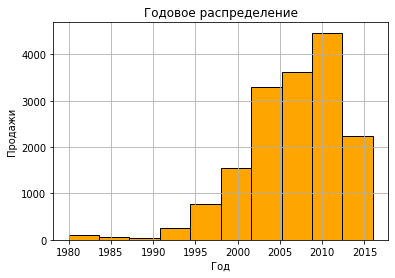

In [32]:
games['year_of_release'].hist(bins=10, color = 'orange', edgecolor = 'black');


plt.title('Годовое распределение')
plt.xlabel('Год')
plt.ylabel('Продажи');

**Вывод:**
- По графику видно, что начиная с 2002 года можно увидеть рост тиража выпущенных игр;
- В 2009 - 2012 годах виден всплеск по производству и выпуску игр;
- Игры начали выпускаться с 1980 - значит данные до 1994 года не сильно важны;

### Динамика продаж по платформам
**Для начала нужно отсортировать платформы по объемам продаж**

In [16]:
games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


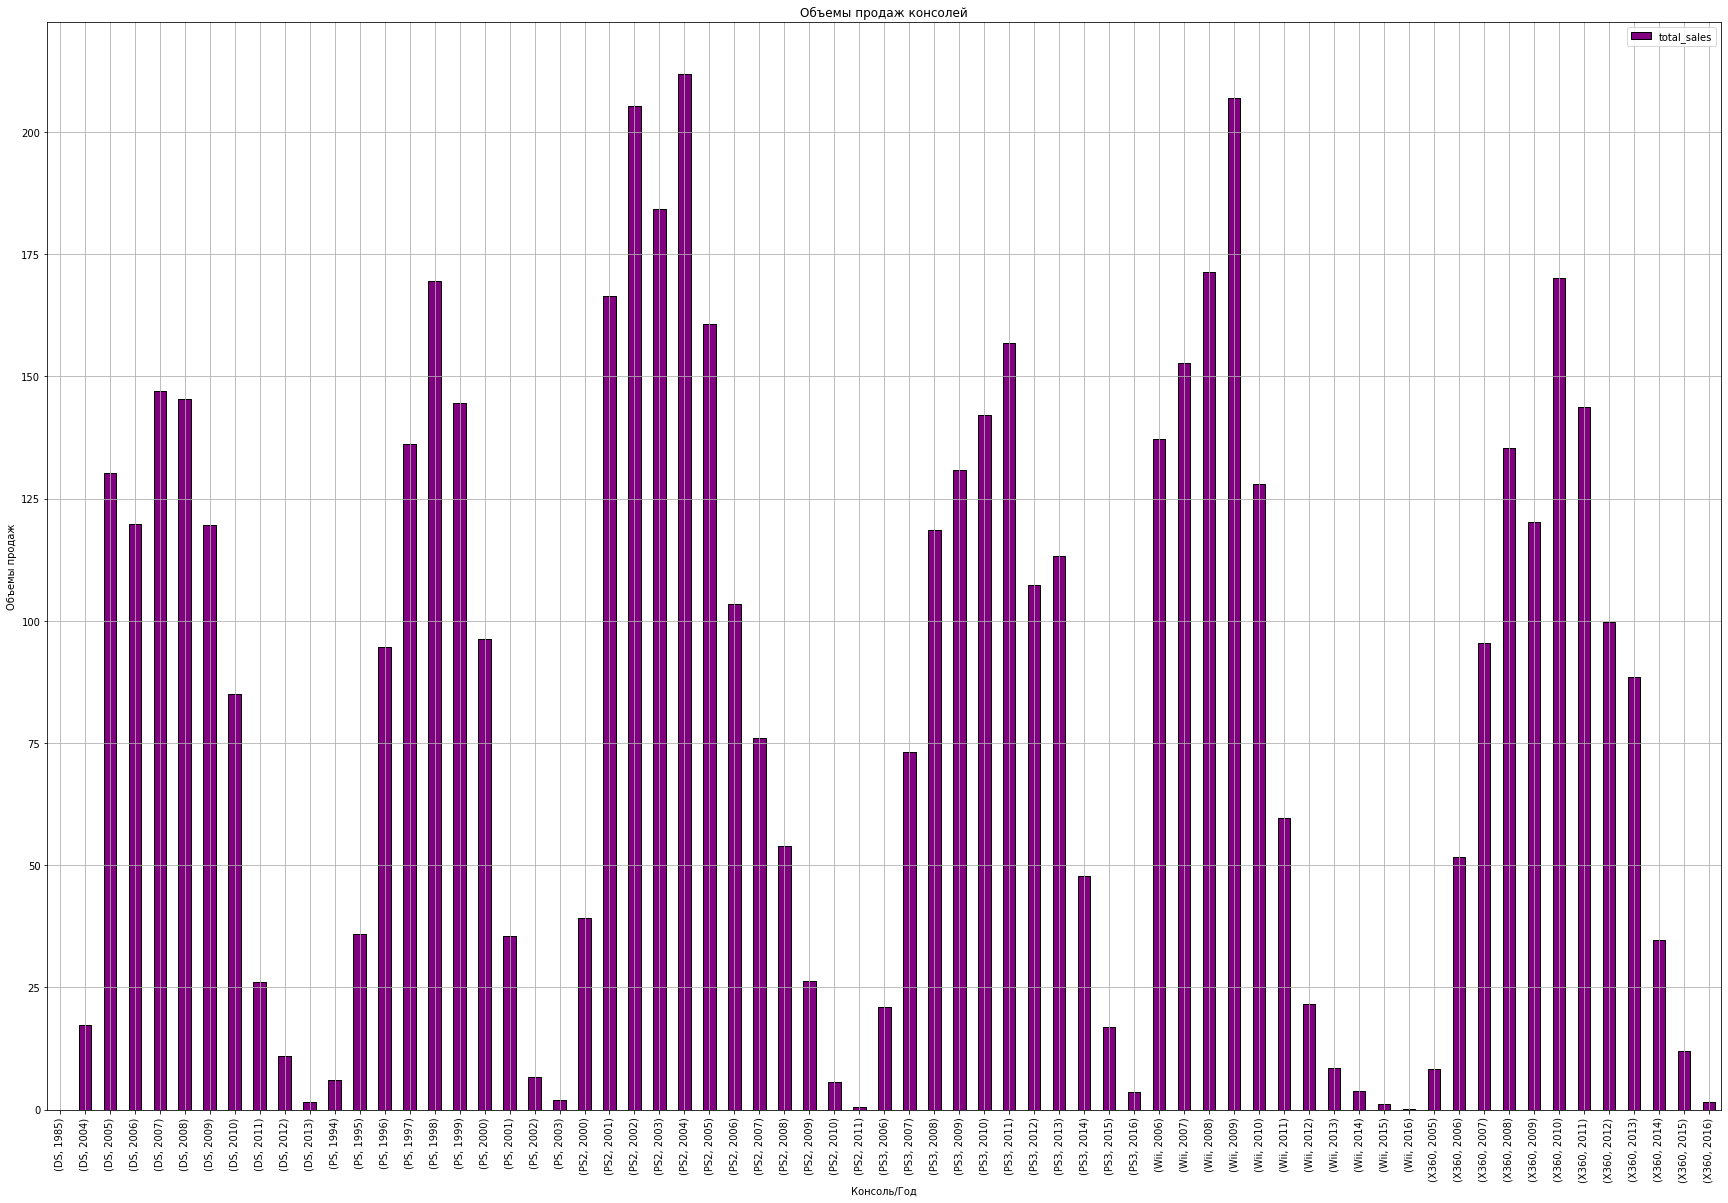

In [42]:
#Проверим изменения продаж на платформах с самыми большими объемами

(
    games
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .query('platform in ["PS2", "X360", "Wii", "PS3", "DS", "PS"]')
    .plot(y='total_sales',
         kind='bar',
         figsize=(30,20),
         grid=True,
         color = 'purple',
         edgecolor = 'black')
);

plt.title('Объемы продаж консолей')
plt.xlabel('Консоль/Год')
plt.ylabel('Объемы продаж');

**Вывод:**
- На графике заметно проссматривается периодичность актуальности продаж игровых платформ, которая составляет 8 - 10 лет;

### Выбор и анализ актуального периода для прогноза
*За актуалный период взяты данные 2014 - 2016 года.*

In [43]:
actual_period = games[games['year_of_release'] >= 2014].reset_index(drop=True)
actual_period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 158.5+ KB


Как и во всём датафрейме в этом фрагменте есть много пропусков в оценках.

В остальном, срез вполне пригоден для анализа и составления прогноза.

### Определение лидирующих платформ
Проверим платформы за выбранный период.

In [44]:
actual_period['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

**Создадим графики для наглядного рассмотрения тенденций в продажах каждой платформы**

In [46]:
#top_platforms = games['platform'].value_counts().head(10)
platforms_ascending = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
#top_platforms = platforms_ascending.head(10).reset_index()
top_platforms = platforms_ascending.reset_index()
iloc_top_platforms = top_platforms.iloc[0:10]
#top_platforms_dict =top_platforms.unique()
top_platforms = iloc_top_platforms['platform'].unique()
platforms_ascending

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


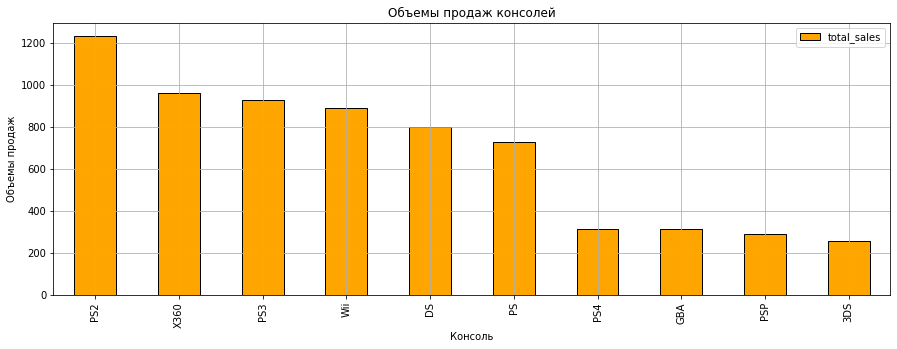

In [51]:
iloc_top_platforms.plot(x="platform", 
                        y="total_sales", 
                        kind='bar', 
                        figsize=(15,5),
                        color = 'orange',
                        edgecolor = 'black',
                        grid = True);
plt.title('Объемы продаж консолей')
plt.xlabel('Консоль')
plt.ylabel('Объемы продаж');

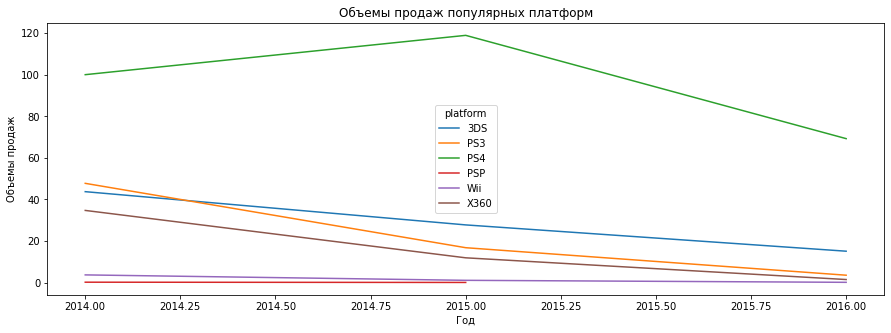

In [55]:
actual_period.query('platform in @top_platforms').pivot_table(index='year_of_release', 
                                                              columns = 'platform', 
                                                              values='total_sales', 
                                                              aggfunc='sum').plot(figsize=(15, 5));
plt.title('Объемы продаж популярных платформ')
plt.xlabel('Год')
plt.ylabel('Объемы продаж');

**Вывод:**

После изучения графиков и, принимая во внимание тот факт, что данные за 2016 год неполные (хотя, мы не знаем, насколько они неполные - возможно они представлены за 11 месяцев), можно рискнуть сделать выводы:

- Все игры на платформах идут на снижение по продажам;
- Среди них игры на PS4 продаются гораздо чаще, потому что консоль появилась не так давно и является потенциально прибыльной,  
- Падает сильнее всего спрос на консоли: X360, PS3. На остальные консоли уже давно упал спрос, либо они вообще не продаются;
- Бесперспективные платформы, у которых наблюдается тенденция к снижению продаж: `PSP, WiiU, PS3, X360, PC, Wii, PSV`;
- Перспективные платформы (находятся в зоне роста или стагнации по продажам): `3DS, PS4, XOne`;

*Итого потенциально прибыльные:*
- PS4, XOne, 3DS

*Потенциально не будут продаваться:*
- X360, PS3

### Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам

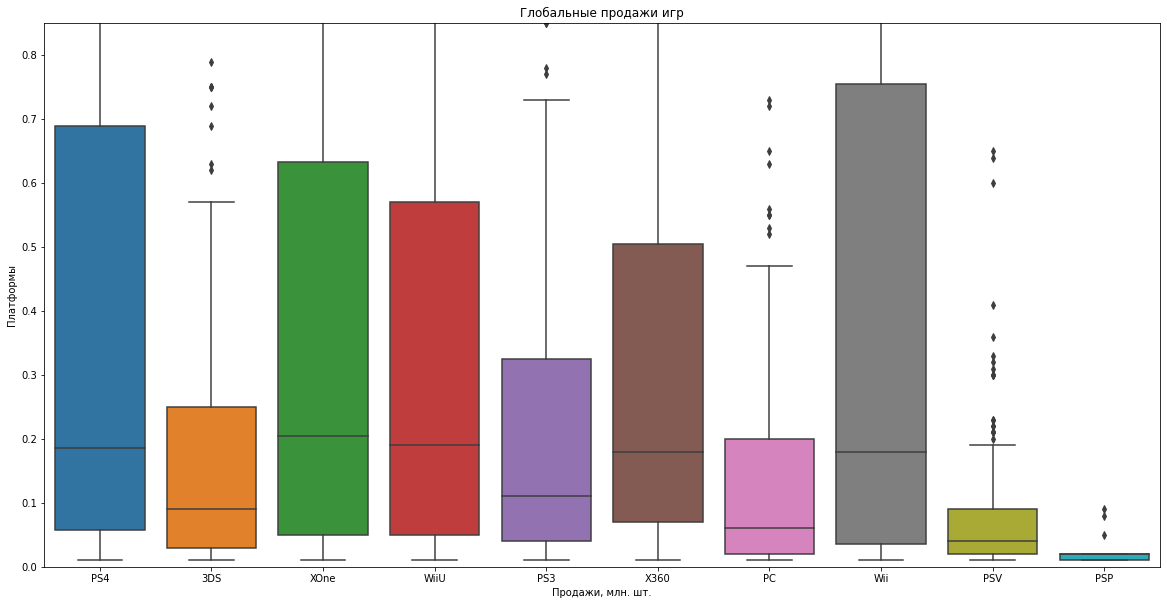

In [56]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=actual_period, x='platform', y='total_sales')

plt.ylim(0, .85)

plt.title('Глобальные продажи игр')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Платформы')

plt.show();

In [57]:
actual_period.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


У всех платформ среднее значение продаж значительно больше медианного. 

Наибольшее стандартное отклонение наблюдается у платформ `PS4, 3DS, WiiU, XOne`.

### Влияние отзывов пользователей и критиков на продажи у XOne 

Рассматривается данная платформа, так как она набирает популярность у пользователей.

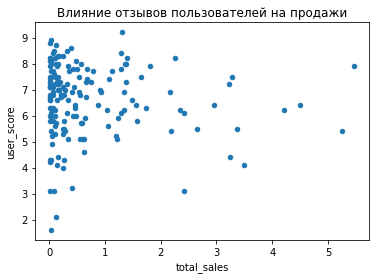

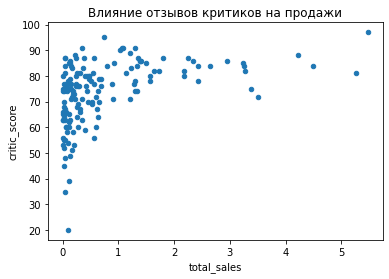

In [58]:
actual_period[actual_period['platform'] == 'XOne'].plot(x='total_sales', y='user_score', kind='scatter')
plt.title('Влияние отзывов пользователей на продажи');
actual_period[actual_period['platform'] == 'XOne'].plot(x='total_sales', y='critic_score', kind='scatter')
plt.title('Влияние отзывов критиков на продажи');

**Вычислим коэффициенты корреляции Пирсона попарно между отзывами и продажами**

In [59]:
display('Коэффициент корреляции Пирсона между продажами и оценкой пользователей: ',
    actual_period[actual_period['platform'] == 'XOne']['total_sales']
        .corr(actual_period[actual_period['platform'] == 'XOne']['user_score'])
)
display("Коэффициент корреляции Пирсона между продажами и оценкой критиков: ",
    actual_period[actual_period['platform'] == 'XOne']['total_sales']
        .corr(actual_period[actual_period['platform'] == 'XOne']['critic_score'])
)

'Коэффициент корреляции Пирсона между продажами и оценкой пользователей: '

-0.0703839280647581

'Коэффициент корреляции Пирсона между продажами и оценкой критиков: '

0.42867694370333226

**Вывод:**

- По диаграмме видно, что в целом оценки критиков с оценками пользователей совпадают;
- Объём продаж и оценки пользователей практически не коррелируют, так как коэффициент отрицательный;
- Между объёмом продаж и оценками критиков наблюдается слабая прямая корреляция;

### Влияние отзывов критиков и пользователей на продажи игр на остальных платформах

**Вычислим коэффициенты корреляции Пирсона попарно между отзывами и продажами**

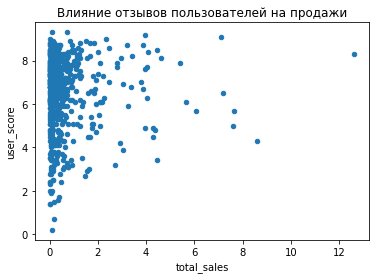

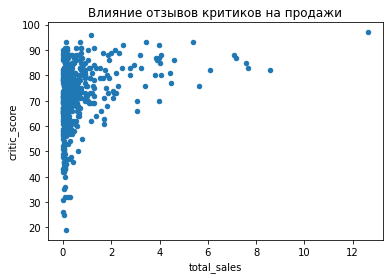

In [61]:
actual_period[actual_period['platform'] != 'XOne'].plot(x='total_sales', y='user_score', kind='scatter')
plt.title('Влияние отзывов пользователей на продажи');
actual_period[actual_period['platform'] != 'XOne'].plot(x='total_sales', y='critic_score', kind='scatter')
plt.title('Влияние отзывов критиков на продажи');

In [62]:
display("Коэффициент корреляции Пирсона между продажами и оценкой пользователей: ",
    actual_period[actual_period['platform'] != 'XOne']['total_sales']
        .corr(actual_period[actual_period['platform'] != 'XOne']['user_score'])
)
display("Коэффициент корреляции Пирсона между продажами и оценкой критиков: ",
    actual_period[actual_period['platform'] != 'XOne']['total_sales']
        .corr(actual_period[actual_period['platform'] != 'XOne']['critic_score'])
)

'Коэффициент корреляции Пирсона между продажами и оценкой пользователей: '

-0.0025949515406363936

'Коэффициент корреляции Пирсона между продажами и оценкой критиков: '

0.302042487886709

**Вывод:**
Для остальных платформ выводы по корреляции такие же: практически нет связи между продажами и оценкой пользователей, и совсем небольшая прямая связь между продажами и оценками критиков.

### Анализ распределения игр по жанрам 

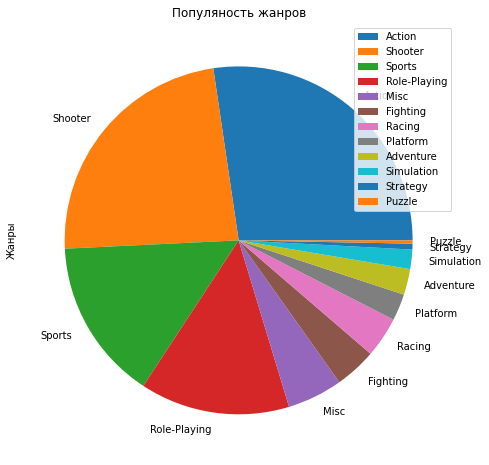

In [79]:
actual_period.pivot_table(index = 'genre', 
                          values = 'total_sales', 
                          aggfunc = 'sum').sort_values(ascending=False, 
                                                       by = 'total_sales').plot(kind='pie', 
                                                                                figsize=(8,8), 
                                                                                y= 'total_sales');
plt.title('Популяность жанров')
plt.ylabel('Жанры');

**Вывод:**
- Абсолютный лидер жанр по представленности в выборке - `Action`;
- Далее: `Sports, Shooter, Sports, Role-Playing`;
- Наименее прибыльные жанры - `Strategy, Puzzle`;

In [65]:
#Посмотрим объемы продаж жанров
(
    actual_period
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Числення таблица подтверждает достоверность полученного выше графика.

Посмотрим на числовое описание данных по продажам игр в различных жанрах

In [66]:
actual_period.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


- У наиболее прибыльных жанров наблюдаем значительную разницу между средними и медианными значениями и большое значение стандартных отклонений, что свидетельствует о неоднородности данных;
- Для жанров, приносящих меньше прибыли характерно более низкое стандартное отклонение, но разница между медианой и средним всё же довольно высокая;
- После рассмотрения медианных и средних значений можно сделать заключение: жанром-лидером со стабильными продажами с большим отрывом от конкурентов является `Shooter`;

**Общий вывод:**
- Большая часть выпущенных игр в представленной выборке приходится на период с 2002 до 2016 года;
- Периодичность "жизненного" цикла игровых платформ составляет 8-10 лет;
- Перспективные платформы (находятся в зоне роста или стагнации по продажам): `PS4, XOne, PSP`;
- Вычисление коэффициентов корреляции Пирсона дало следующие результаты:
    - связь между оценкой пользователей и продажами минимальна или незначительна;
    - совсем небольшая прямая связь между продажами и оценками критиков;
- Жанры-лидеры по представленности в выборке - `Action, Role-Playing, Sports, Shooter`;
- Наиболее прибыльный жанр: `Shooter`;

## Составление портрета пользователя каждого региона

In [67]:
actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98


### Определение топ-5 по популярности платформ для каждого региона

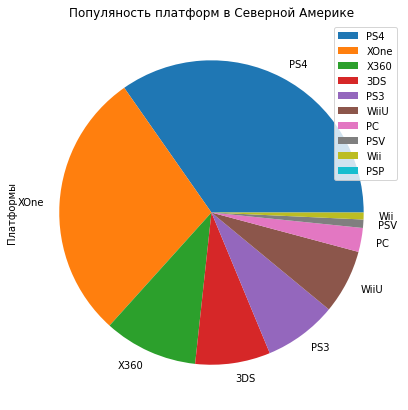

In [87]:
actual_period.pivot_table(index = 'platform', 
                          values = 'na_sales', 
                          aggfunc = 'sum').sort_values(ascending=False, 
                                                       by = 'na_sales').plot(kind = 'pie', 
                                                                             figsize=(7,7),
                                                                            y = 'na_sales');

plt.title('Популяность платформ в Северной Америке')
plt.ylabel('Платформы');

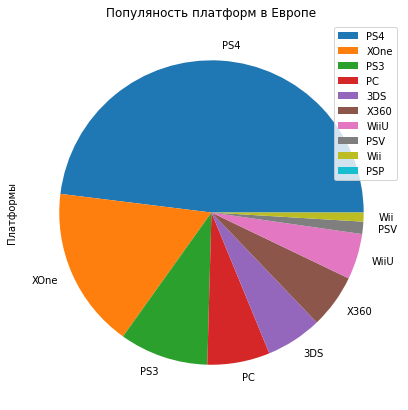

In [88]:
actual_period.pivot_table(index = 'platform', 
                          values = 'eu_sales', 
                          aggfunc = 'sum').sort_values(ascending=False, 
                                                       by = 'eu_sales').plot(kind = 'pie', 
                                                                             figsize=(7,7),
                                                                            y = 'eu_sales');

plt.title('Популяность платформ в Европе')
plt.ylabel('Платформы');

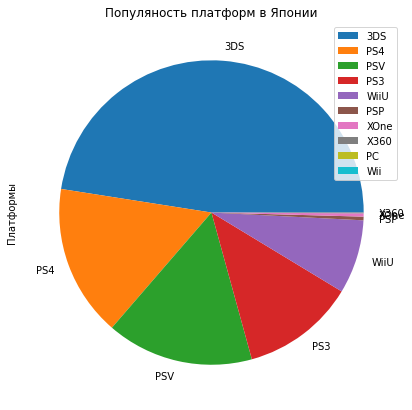

In [89]:
actual_period.pivot_table(index = 'platform', 
                          values = 'jp_sales', 
                          aggfunc = 'sum').sort_values(ascending=False, 
                                                       by = 'jp_sales').plot(kind = 'pie', 
                                                                             figsize=(7,7),
                                                                            y = 'jp_sales');

plt.title('Популяность платформ в Японии')
plt.ylabel('Платформы');

- В Северной Америке и Европе выбор игровых платформ схож, в Японии - игроки в целом отдают предпочтения другим приставкам;
- Американские пользователи одинаково примерно в раной степени покупают игры двух лидирующих платформ: `PS4` и `XOne`;
- В Европе явное предпочтение отдаётся `PS4`;
- В Японии пользователи больше интересуются `Nintendo 3DS`;

*Можно сделать общий вывод, что пользователи предпочитают играть на платформах своей же страны*

### Определение топ-5 по популярности жанров для каждого региона

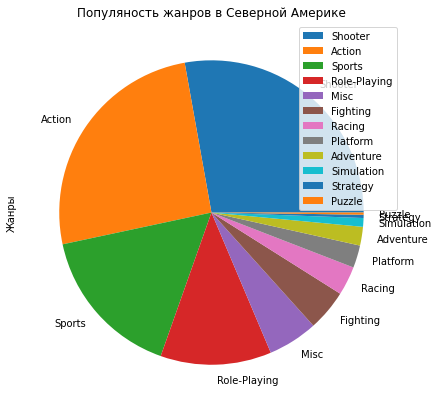

In [90]:
actual_period.pivot_table(index = 'genre', 
                          values = 'na_sales', 
                          aggfunc = 'sum').sort_values(ascending=False, 
                                                       by = 'na_sales').plot(kind = 'pie', 
                                                                             figsize=(7,7),
                                                                            y = 'na_sales');

plt.title('Популяность жанров в Северной Америке')
plt.ylabel('Жанры');

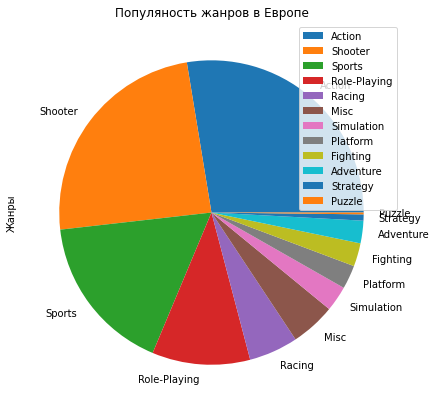

In [91]:
actual_period.pivot_table(index = 'genre', 
                          values = 'eu_sales', 
                          aggfunc = 'sum').sort_values(ascending=False, 
                                                       by = 'eu_sales').plot(kind = 'pie', 
                                                                             figsize=(7,7),
                                                                            y = 'eu_sales');

plt.title('Популяность жанров в Европе')
plt.ylabel('Жанры');

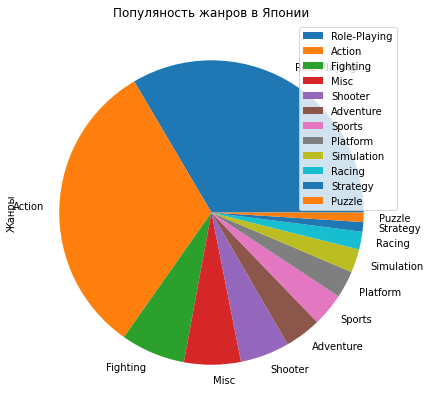

In [92]:
actual_period.pivot_table(index = 'genre', 
                          values = 'jp_sales', 
                          aggfunc = 'sum').sort_values(ascending=False, 
                                                       by = 'jp_sales').plot(kind = 'pie', 
                                                                             figsize=(7,7),
                                                                            y = 'jp_sales');

plt.title('Популяность жанров в Японии')
plt.ylabel('Жанры');

- Пользователи Европы и Северной Америки играют почти в одни и те же консоли и поэтому популярны жанры схожи - `Action, Sports, Shooter`;
- В Японии преобладают пользователи с портативными консолями, в которые можно играть не только дома, поэтому они предпочитают жанр - `Role-Playing` и редко играют в игры с жанром - `Shooter`;

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [95]:
actual_period['region'] = actual_period['na_sales'] + actual_period['eu_sales'] + actual_period['jp_sales'] 
# Соберём все регионы вместе

In [98]:
ESRB = actual_period.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
Unknown,58.95,56.90,64.72


В целом, можно заметить, что рейтинг влияет на продажи в отдельных регионах:

- В Северной Америке и Европе у наиболее популярных платформ стоит рейтинг M;
- В Японии у самых популярных платформ отсутствует рейтинг. Вероятно, это имеет отношение к тому, что присваиванием этих рейтингов занимается американская компания;
- При этом у E10+ заметно преобладание популярности в Северной Америке;
- Также можно заметить, что в основном у Японии четкие несовпадения в интересах с Европой и Северной Америкой;

**Общий вывод:**

- В Северной Америке и Европе выбор игровых платформ схож, в Японии - игроки в целом отдают предпочтения другим приставкам;

- Американские пользователи одинаково примерно в раной степени покупают игры двух лидирующих платформ: `PS4` и `XOne`;

- В Европе явное предпочтение отдаётся `PS4`;

- В Японии пользователи больше интересуются `Nintendo 3DS`;

- Пользователи Европы и Северной Америки играют в целом в одни и те же консоли и поэтому популярны жанры - `Action, Sports, Shooter`;

- В Японии преобладают пользователи с портативными консолями, в которые можно играть не только дома, поэтому они предпочитают жанр - `Role-Playing`;

- Жанры-лидеры по представленности в выборке - `Action, Role-Playing, Sports, Shooter`;

- Наиболее прибыльный жанр: `Shooter`;

- В Северной Америке и Европе у наиболее популярных платформ стоит рейтинг M, но явной связи между рейтингом и популярностью не прослеживается;

- В Японии у самых популярных платформ отсутствует рейтинг. Вероятно, это имеет отношение к тому, что присваиванием этих рейтингов занимается американская компания;

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

*Нулевая гипотеза*: средние пользовательские рейтинги платформы `Xbox One` равны средним пользовательским рейтингам платформы `PC`. 

*Альтернативная гипотеза*: средние пользовательские рейтинги платформ `Xbox One` и `PC` различаются.

Для проверки нулевой гипотезы используем `ttest`

In [42]:
alpha = .01

results = st.ttest_ind(
    actual_period[actual_period['platform'] == 'PC']['user_score'].dropna(), 
    actual_period[actual_period['platform'] == 'XOne']['user_score'].dropna()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Проведённый статистический тест не позволяет нам отвергнуть нулевую гипотезу. Но и утверждать, что средние пользовательские рейтинги платформ `Xbox One` и `PC` различаются на его основании мы не можем.**

### Средние пользовательские рейтинги жанров Action и Sports разные

*Нулевая гипотеза*: средние пользовательские рейтинги жанров `Action` и `Sports` равны.

*Альтернативная гипотеза*: средние пользовательские рейтинги жанров `Action` и `Sports` разные.

In [43]:
alpha = .01

results = st.ttest_ind(
    actual_period[actual_period['genre'] == 'Action']['user_score'].dropna(), 
    actual_period[actual_period['genre'] == 'Sports']['user_score'].dropna()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Проведённый статистический тест позволяет отвергнуть нулевую гипотезу. Но утверждать, что средние пользовательские рейтинги жанров `Action` и `Sports` разные на его основании мы не можем.**

*По итогам проведённого исследования можем сделать следующие заключения:*

- Большая часть выпущенных игр в представленной выборке приходится на период с 2002 до 2016 года.

- Периодичность "жизненного" цикла игровых платформ составляет 8-10 лет.

- Перспективные платформы: `PS4, XOne, PSP`.

*Вычисление коэффициентов корреляции Пирсона дало следующие результаты:*

- Вычисление коэффициентов корреляции Пирсона дало следующие результаты:
    - связь между оценкой пользователей и продажами минимальна или незначительна;
    - совсем небольшая прямая связь между продажами и оценками критиков;
    
- Жанры-лидеры по представленности в выборке - `Action, Role-Playing, Sports, Shooter`.

- Наиболее прибыльный жанр: `Shooter`.

- В Северной Америке и Европе выбор игровых платформ схож, в Японии - игроки в целом отдают предпочтения другим приставкам.

- Американские пользователи одинаково примерно в раной степени покупают игры двух лидирующих платформ: `PS4` и `XOne`.

- В Европе явное предпочтение отдаётся `PS4`.

- В Японии пользователи больше интересуются `Nintendo 3DS`.

- Жанры-лидеры продаж в Северной Америке полностью совпадают с разницей в объёмах около 1.5 раза.

- В Японии предпочитают жанр - `Role-Playing`;

- Самый популярный жанр игр - `Action`.

- В Северной Америке и Европе у наиболее популярных платформ стоит рейтинг M, но явной связи между рейтингом и популярностью не прослеживается.

- В Японии у самых популярных платформ отсутствует рейтинг. Вероятно, это имеет отношение к тому, что присваиванием этих рейтингов занимается американская компания.

*Проверка гипотез:*

- Гипотеза не подтвердилась. Средние пользовательские рейтинги платформ `Xbox One` и `PC` разные.

- Гипотеза подтвердилась. Средние пользовательские рейтинги жанров `Action` и `Sports` разные.